<a href="https://colab.research.google.com/github/p-dros/Analysis/blob/main/regression/project_perth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Project

This data set consists of positions and absorbed power outputs of wave energy converters (WECs) in four real wave scenarios from the southern coast of Australia.

# Exploring Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_adel = pd.read_csv('Adelaide_Data.csv', header=None)
df_perth = pd.read_csv('Perth_Data.csv', header=None)
df_sydney = pd.read_csv('Sydney_Data.csv', header=None)
df_tasm = pd.read_csv('Tasmania_Data.csv', header=None)

print(f"Adelaide: {df_adel.shape}")
print(f"Perth: {df_perth.shape}")
print(f"Sydney: {df_sydney.shape}")
print(f"Tasmania: {df_tasm.shape}")

Adelaide: (71999, 49)
Perth: (72000, 49)
Sydney: (72000, 49)
Tasmania: (72000, 49)


**Dataset overview**

The column names are being aligned with the expected data structure as per the provided documentation:

**WECs Position**:
The columns are expected to represent the positions of the Wind Energy Converters (WECs) and are structured in the form {X1, X2, ..., X16; Y1, Y2, ..., Y16}. The values are continuous and fall within the range of 0 to 566 meters.

**WECs Absorbed Power**:
The columns are anticipated to signify the absorbed power values of individual Wind Energy Converters (WECs) and are structured as {P1, P2, ..., P16}.
Total Power Output of the Farm (Powerall):

The last column, denoted as **Powerall** is expected to represent the cumulative power output of the entire wind farm.

These modifications aim to enhance the clarity and conformity of the column names with the documented attributes, ensuring a more intuitive and meaningful representation of the dataset.

### Summary

So, our dataset looks like this: we have 16 WEC objects floating in the water. We take numerous measurements, during which we record the coordinates (x, y) of each WEC. For each measurement, we note the amount of energy produced (I assume since the last measurement) by each WEC. The final value int the last column is the total energy produced by all 16 WECs combined.

## Renaming columns

In [ ]:
new_column_names = []
for i in range(1, 17):
    new_column_names.append(f'X{i}')
for i in range(1, 17):
    new_column_names.append(f'Y{i}')
for i in range(1, 17):
    new_column_names.append(f'P{i}')
new_column_names.append('power_all')

In [ ]:
def renameColumns(df, column_names):
  df.columns = column_names

for df in [df_adel, df_perth, df_sydney, df_tasm]:
    renameColumns(df, new_column_names)

df_adel

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,power_all
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71994,3.8797,404.4992,234.2780,376.1119,102.9226,36.2912,514.6270,46.8826,445.1958,349.5316,...,86933.6457,91106.2462,97434.6883,95570.9138,98628.2855,98105.9871,89601.6071,82725.8873,80445.6594,1467289.650
71995,46.1547,487.8102,219.0245,86.9150,0.0000,220.0181,245.4543,566.0000,186.7975,387.0030,...,98664.0425,98768.0367,82632.8147,89918.6021,98459.7871,97236.8381,94952.4834,96287.3278,84404.0143,1478583.526
71996,46.1547,487.8102,219.0245,91.3298,0.0000,170.9280,245.4543,566.0000,159.1193,354.2496,...,97652.9080,97739.9290,83276.0677,98513.1676,96019.8837,97055.5035,96637.3240,82703.7936,86147.6309,1481407.346
71997,46.1547,487.8102,219.0245,86.9150,0.0000,170.9280,270.4428,566.0000,186.7975,383.7056,...,98574.9453,97633.1866,80409.8889,100764.2109,97238.1602,97136.1670,93293.8948,94774.7468,86060.9838,1493177.043


## Static 3D Scatter Plot

### Function Signature
```python
plot_3d(df: DataFrame, wec_num: int, step_size: int = 100) -> None:
```

### About the plot

This function generates a 3D static scatter plot to visualize the energy absorption of a single WEC at different positions.

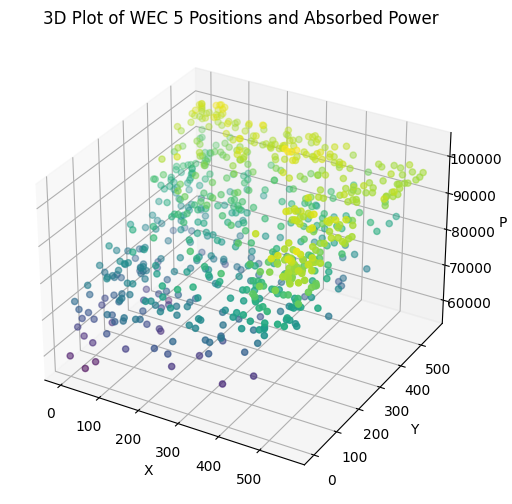

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot3D(df, wec_num, step_size = 100):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot every step_sizeth value for clarity
    sc = ax.scatter(df[f'X{wec_num}'][::step_size], df[f'Y{wec_num}'][::step_size], df[f'P{wec_num}'][::step_size], c=df[f'P{wec_num}'][::step_size], cmap=cm.viridis)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('P')
    ax.set_title(f'3D Plot of WEC {wec_num} Positions and Absorbed Power')
    # cbar = fig.colorbar(sc, ax=ax, label=f'Absorbed Power (P{wec_num})')
    plt.show()

plot3D(df_perth, 5)


## Interactive 3D Scatter Plot

### Function Signature

```python
plot_model(df: DataFrame, wec_num: int, step_size: int = 100) -> None:
```
### About plot

The plot visualizes the energy absorption of a single WEC at different positions.


In [ ]:
import plotly.graph_objects as go

def plot_model(df, wec_num, step_size=100):
    scatter = go.Scatter3d(
        x=df[f'X{wec_num}'][::step_size],
        y=df[f'Y{wec_num}'][::step_size],
        z=df[f'P{wec_num}'][::step_size],
        mode='markers',
        marker=dict(size=5, color=df[f'P{wec_num}'][::step_size], colorscale='Viridis', opacity=0.8)
    )
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='P'),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=0.5)
        )
    )
    fig = go.Figure(data=[scatter], layout=layout)
    fig.show()

plot_model(df_perth, 1)




## Absorbed Power Over Measurement Index

### Function Signature
```python
plot_power_over_measurement_index(df: DataFrame, wec_num: int) -> None:
```

### About plot
This function generates a scatter plot to visualize the absorbed power (P) of a specific WEC over the measurement index.

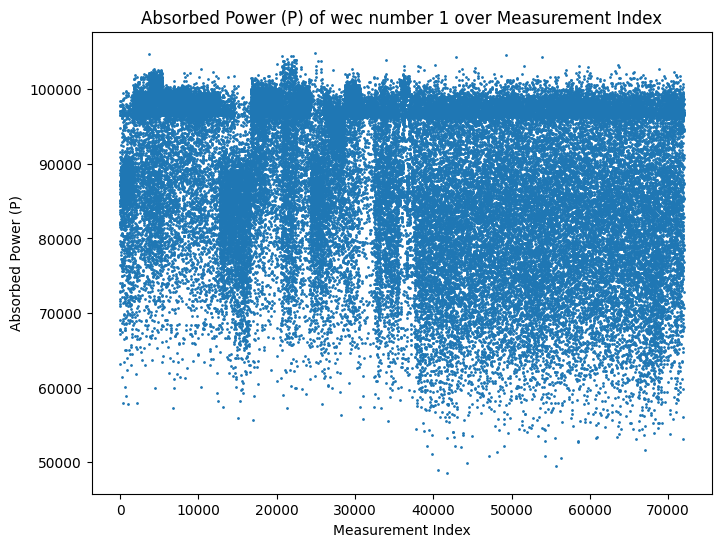

In [ ]:
def plot_power_over_measurement_index(df, wec_num):
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[f"P{wec_num}"], s=1)
    plt.title(f'Absorbed Power (P) of wec number {wec_num} over Measurement Index')
    plt.xlabel('Measurement Index')
    plt.ylabel('Absorbed Power (P)')
    plt.show()

plot_power_over_measurement_index(df_perth, 1)

# Outliers Removal

The function generates a plot illustrating the Total Power distribution, accompanied by lines representing the mean and the range of mean ± 2*std. This visualization aids in identifying potential outliers within the data.

---

These lines serve as a reference, indicating the boundaries that should be considered when processing data for use in our model.

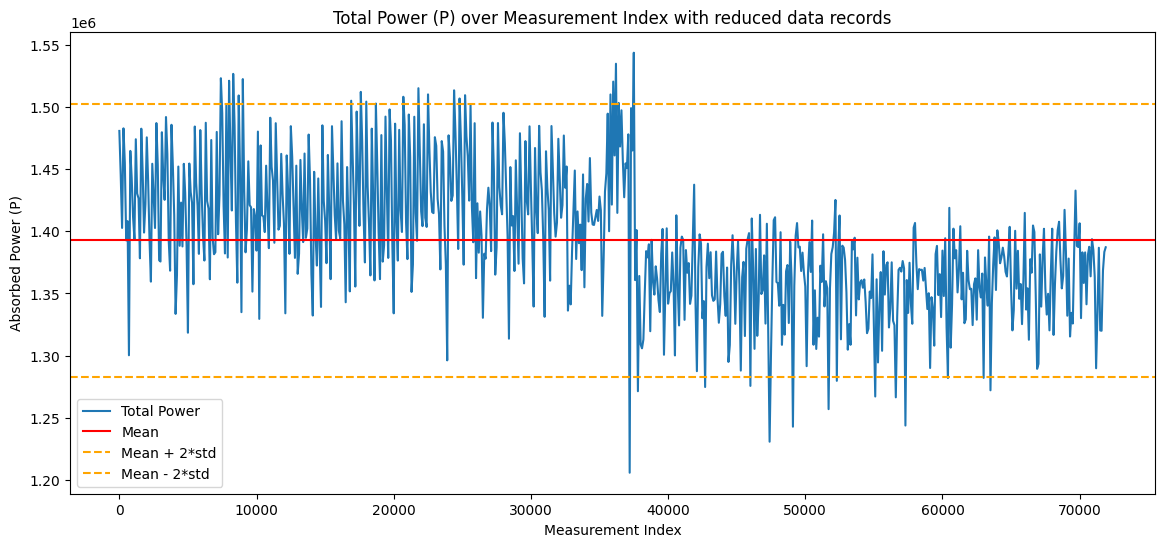

72000


In [ ]:
def plot_total_power(df, step=100):
    plt.figure(figsize=(14, 6))
    index = df.index[::step]
    power_all = df["power_all"][::step]

    plt.plot(index, power_all, label='Total Power')

    mean = power_all.mean()
    std = power_all.std()

    plt.axhline(y=mean, color='r', linestyle='-', label='Mean')
    plt.axhline(y=mean + 2*std, color='orange', linestyle='--', label='Mean + 2*std')
    plt.axhline(y=mean - 2*std, color='orange', linestyle='--', label='Mean - 2*std')

    plt.title('Total Power (P) over Measurement Index with reduced data records')
    plt.xlabel('Measurement Index')
    plt.ylabel('Absorbed Power (P)')
    plt.legend()
    plt.show()

plot_total_power(df_perth)
print(len(df_perth))

In [ ]:
def remove_outliers(df):
  mean = df["power_all"].mean()
  std = df["power_all"].std()
  highest_allowed = mean+2*std
  lowest_allowed = mean-2*std

  df_new = df[(df["power_all"] < highest_allowed) & (df["power_all"] > lowest_allowed)]
  return df_new

df_adel = remove_outliers(df_adel)
df_tasm = remove_outliers(df_tasm)
df_sydney = remove_outliers(df_sydney)
df_perth = remove_outliers(df_perth)

df_perth

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,power_all
0,427.0737,155.1636,476.0661,5.7677,255.5230,410.5835,516.3158,47.4719,75.7125,463.0522,...,100328.8932,79696.1132,90093.0925,79395.6995,100893.8537,91116.6415,98560.6700,99789.2341,78199.7899,1480707.346
1,427.4820,147.4593,474.9960,9.5407,258.2593,404.2589,524.3422,44.4009,70.4385,468.8828,...,98879.6861,82893.9171,89158.6518,80356.5067,100927.1007,89760.5631,97828.2206,99214.7876,79108.3094,1479133.940
2,423.7709,155.9451,470.8182,4.0438,253.8868,390.2231,509.0224,50.7996,72.8076,463.4203,...,100504.0370,81572.7820,89932.3496,80588.3130,100977.1693,90274.1347,97757.2251,99333.6857,79691.2458,1475814.243
3,431.8288,146.6720,466.1145,7.0164,261.3787,408.9941,521.9852,44.0360,77.5854,450.5736,...,99857.6062,82267.0302,88657.7954,79139.2437,100480.0554,91102.1702,98224.0435,100672.3076,78387.9296,1484052.684
4,437.7897,141.3579,474.3819,4.3434,256.5644,393.0113,516.1617,52.4880,66.1179,457.0365,...,99953.9882,80579.2854,88819.3409,80145.6969,100693.3759,89663.6079,97947.9575,100924.1871,80104.7240,1479350.362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,19.5135,478.6166,148.2143,450.2319,125.6785,70.9718,565.6854,37.7842,544.1133,236.7326,...,82807.0013,96673.3485,98322.2288,90516.3356,98225.3308,88545.3620,98633.4520,79355.9524,93153.5318,1402661.032
71996,333.6787,455.1773,432.5572,191.2960,556.6596,565.6854,76.3422,474.0408,133.7307,530.5940,...,68540.8377,97231.3478,88665.7426,83289.3579,70845.5301,89340.3519,95960.4423,64362.9530,83235.4082,1371938.375
71997,439.0799,281.9677,124.0780,403.3259,263.5955,67.5702,469.8106,97.9994,302.2266,210.1420,...,65475.5966,78284.5008,76688.8739,97095.1172,98256.3914,98101.4504,77021.0831,82181.4875,66753.9640,1344431.112
71998,36.1101,457.2237,359.1680,34.9338,543.2708,565.6854,381.4169,409.9652,73.8620,239.3023,...,98128.5683,99297.8783,85440.3420,71196.9682,74577.4145,97672.7105,79145.9303,99317.6534,72925.8792,1392385.246


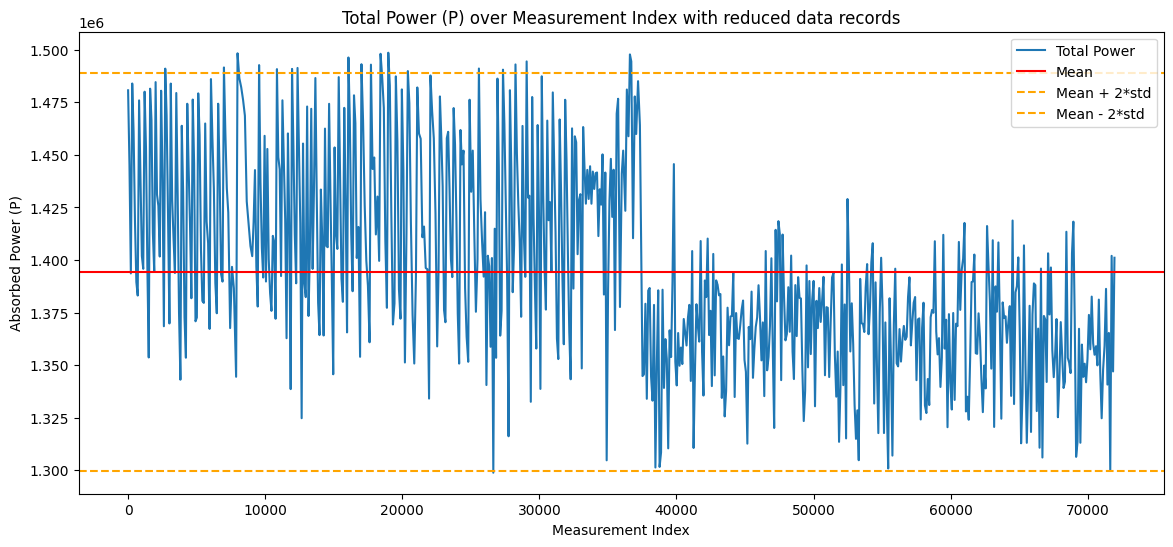

In [ ]:
plot_total_power(df_perth)

**Null values handling**

In the context of our study, the elimination of zero values is imperative due to their indicative nature, suggesting either the absence of a recorded measurement or potential inaccuracies in the data recording process. Zero values in our dataset are considered synonymous with instances where measurements were not conducted or were not correctly documented. Removing these zero values is essential for ensuring the integrity and reliability of our analysis, as they may introduce bias and misrepresent the true underlying trends within the data.

In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
    print(df.isnull().sum().sum())

0
0
0
0


In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
    zeros_df = (df == 0)
    print(zeros_df.sum().sum())

96692
97981
202914
127951


In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
    max_df = (df > 565)
    print(max_df.sum().sum())

1270844
1275587
1397226
1291268


In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
    middle_df_count = ((df > 200) & (df < 251)).sum().sum()
    print(middle_df_count)

153841
148550
142697
159027


**Depicting the frequency of mesaurements**

During the data analysis we observed that there are a lot of mesaurements occuring at the edges of values' set.

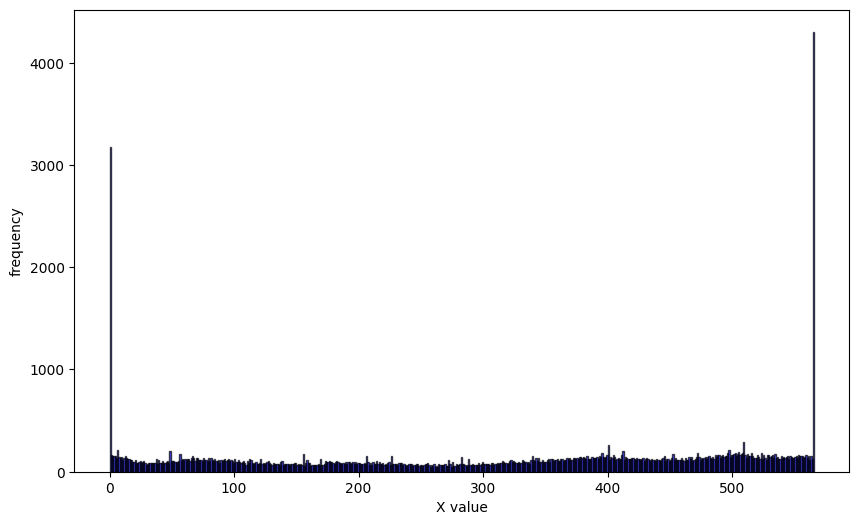

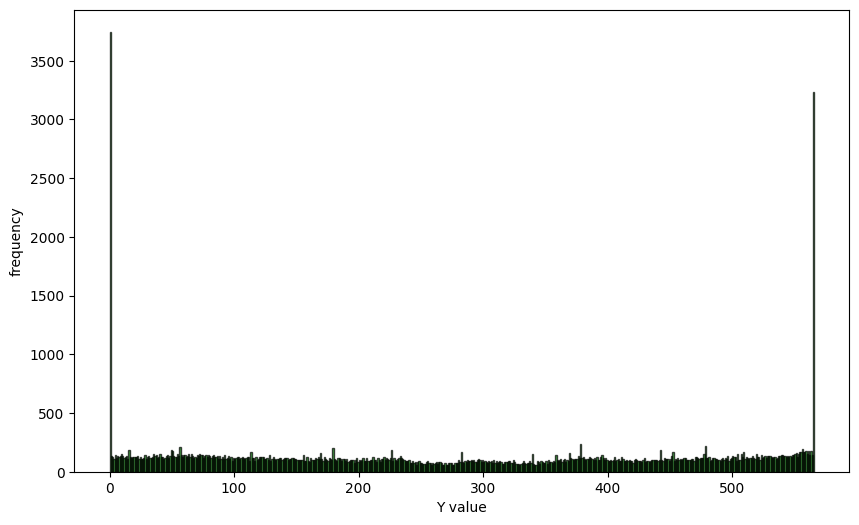

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df_perth['X1'], bins=566, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('X value')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_perth['Y1'], bins=566, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Y value')
plt.ylabel('frequency')
plt.show()

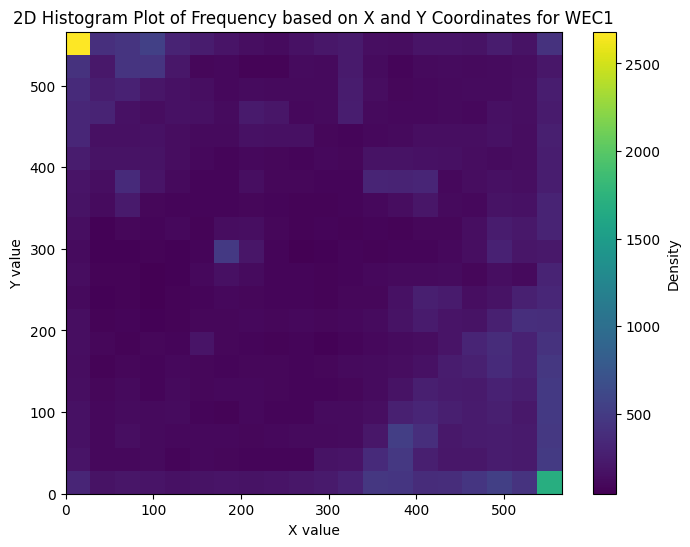

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist2d(df_perth['X1'], df_perth['Y1'], bins=(20, 20), cmap='viridis', cmin=1)
plt.colorbar(label='Density')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title('2D Histogram Plot of Frequency based on X and Y Coordinates for WEC1')

plt.show()

## Looking for correlation

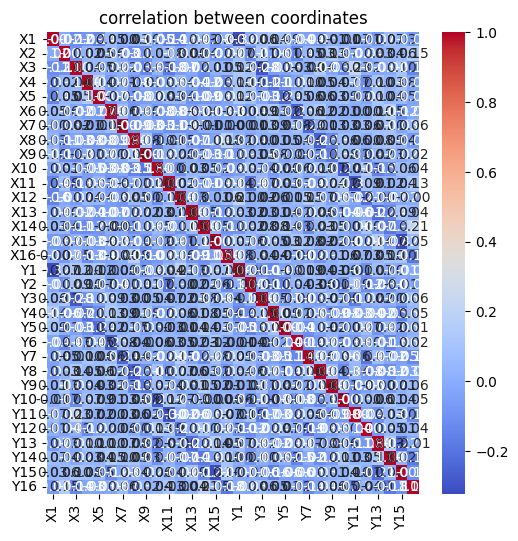

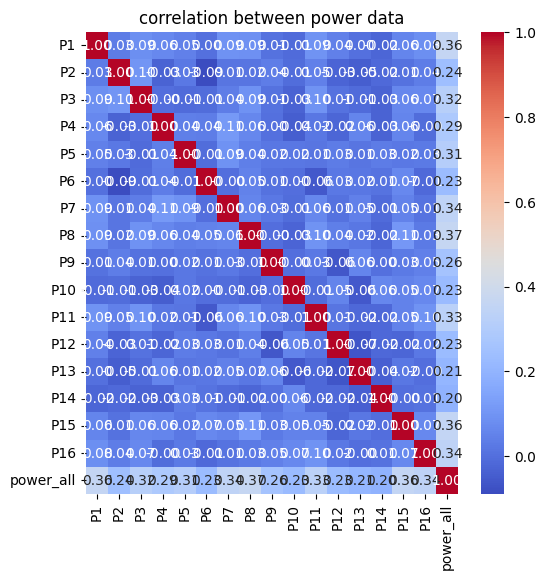

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X_columns = [column for column in df_perth.columns if column.startswith('X')]
Y_columns = [column for column in df_perth.columns if column.startswith('Y')]
P_columns = [column for column in df_perth.columns if column.startswith('P')|column.startswith('p')]

correlation_matrix = df_perth[X_columns + Y_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation between coordinates")
plt.show()

correlation_matrix = df_perth[P_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation between power data")
plt.show()

In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
  correlation_matrix = df.corr()

  correlation_pairs = set()
  for i in range(len(correlation_matrix.columns)):
      for j in range(i):
          attr1, attr2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
          correlation_value = correlation_matrix.iloc[i, j]
          correlation_pairs.add(((attr1, attr2), correlation_value))

  for pair in sorted(correlation_pairs, key=lambda x: abs(x[1]), reverse=True)[:10]:
      print(pair)
  print("\n")


(('P12', 'Y12'), 0.5151252926485352)
(('P7', 'Y7'), 0.4800318740704436)
(('P16', 'X16'), 0.45913105098852114)
(('P6', 'Y6'), 0.4581304709761588)
(('P10', 'X10'), 0.4535308547156571)
(('P5', 'X5'), 0.45164027509843313)
(('P1', 'Y1'), 0.44915729243783303)
(('P8', 'X8'), 0.4363125105060007)
(('power_all', 'P15'), 0.43412168107470905)
(('Y4', 'X4'), -0.43102919303423515)


(('P4', 'Y4'), 0.5271710944010992)
(('P13', 'Y13'), 0.5162111664870076)
(('P2', 'Y2'), 0.5098403428102501)
(('P7', 'Y7'), 0.5073432153780716)
(('P9', 'Y9'), 0.4909575174197961)
(('P10', 'Y10'), 0.48484868663621816)
(('P14', 'Y14'), 0.48039855855765246)
(('P6', 'Y6'), 0.4772565907576995)
(('P16', 'Y16'), 0.4772176875470526)
(('P11', 'Y11'), 0.47000630173454067)


(('P9', 'Y9'), -0.6656736209601694)
(('P6', 'X6'), 0.6638149358974249)
(('P2', 'X2'), 0.6576362578018078)
(('P13', 'Y13'), -0.6574179129079566)
(('P16', 'Y16'), -0.6440148721647898)
(('P2', 'Y2'), -0.6347466835774567)
(('P3', 'Y3'), -0.6265367811060293)
(('P15', 

Examining only the correlation values between consecutive data points does not reveal any robust dependencies that would justify omitting the analysis of certain attributes. Therefore, it is imperative to transition towards a more comprehensive data analysis, stemming from a nuanced comprehension of the numerical values we have acquired.

It is worth noting that a singular measure of correlation does not furnish a complete depiction of the relationships between variables. Despite the absence of strong correlations in the overarching analysis, subtle multidimensional connections between individual attributes may exist, necessitating a more sophisticated approach.

The shift towards a more in-depth data analysis becomes essential for a thorough understanding of the mechanisms underpinning the obtained results. Such an analysis should consider the context, the specificity of the research domain, and potential interactions between variables. Consequently, it will be possible to identify significant factors influencing the studied phenomena, contributing to the attainment of more credible and comprehensive insights from the data analysis.

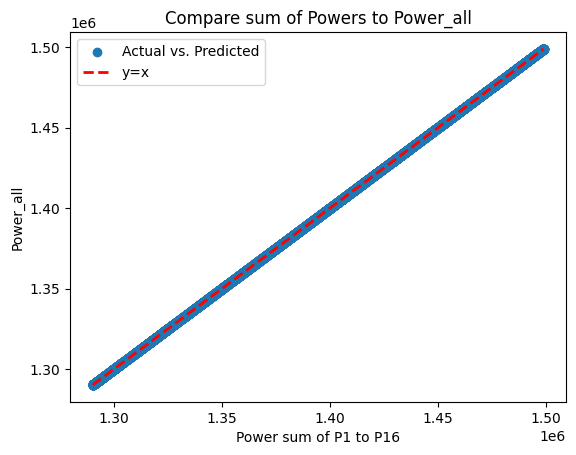

       difference
35704      0.0008
4030       0.0008
37981      0.0008
34537      0.0008
38676      0.0008
23777      0.0008
31114      0.0007
394        0.0007
425        0.0007
12305      0.0007


In [ ]:
sum_X1_X16 = df_perth[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16']].sum(axis=1)
df_perth['sum_X1_X16'] = sum_X1_X16
df_perth['difference'] = df_perth['sum_X1_X16'] - df_perth['power_all']

# plt.figure(figsize=(14, 6))
# plt.scatter(df_perth.index, df_perth['power_all'])
# plt.scatter(df_perth.index, df_perth['sum_X1_X16'], s=2, c='green')

plt.scatter(df_perth['power_all'], df_perth['sum_X1_X16'], label='Actual vs. Predicted')
plt.plot([min(df_perth['sum_X1_X16']), max(df_perth['sum_X1_X16'])], [min(df_perth['sum_X1_X16']), max(df_perth['sum_X1_X16'])], color='red', linestyle='--', linewidth=2, label='y=x')
plt.xlabel("Power sum of P1 to P16")
plt.ylabel("Power_all")
plt.title("Compare sum of Powers to Power_all")
plt.legend()
plt.show()

top_10 = df_perth.nlargest(10, 'difference')
print(top_10[['difference']])


Recognizing that one column consistently sums up several preceding ones allows us to streamline our model. We can forego using the individual columns and focus on the one that aggregates data from all previous instances. This not only enhances model efficiency but also simplifies dataset interpretation, reducing redundancy and potential complexity. The refined model conserves resources and provides a clearer understanding of underlying patterns through strategic feature engineering.







# Normalization

Normalization is a crucial preprocessing step for Wind Energy Converter (WEC) data, involving the adjustment of numerical feature scales to a standard range. This practice holds significance due to several key reasons.

Firstly, it ensures optimal performance of machine learning algorithms that are sensitive to varying feature scales. By normalizing WEC positions and absorbed power, the convergence speed during model training is enhanced, contributing to faster and more efficient learning processes. Moreover, normalization facilitates a consistent interpretation and comparison of features, allowing for a clearer understanding of their contributions to the overall model. Additionally, this technique promotes enhanced generalization, enabling models to effectively handle diverse and unseen data. In the context of renewable energy forecasting or optimization, normalization becomes integral for optimizing the training process, leading to the development of robust models that accurately capture patterns and relationships in WEC-related data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

for df in [df_adel, df_perth, df_sydney, df_tasm]:
  scaler = MinMaxScaler()
  df['power_all_normalized'] = scaler.fit_transform(df[['power_all']])

df_perth

<ipython-input-26-17657a80783e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P11,P12,P13,P14,P15,P16,power_all,sum_X1_X16,difference,power_all_normalized
0,427.0737,155.1636,476.0661,5.7677,255.5230,410.5835,516.3158,47.4719,75.7125,463.0522,...,79395.6995,100893.8537,91116.6415,98560.6700,99789.2341,78199.7899,1480707.346,1.480707e+06,0.0002,0.912604
1,427.4820,147.4593,474.9960,9.5407,258.2593,404.2589,524.3422,44.4009,70.4385,468.8828,...,80356.5067,100927.1007,89760.5631,97828.2206,99214.7876,79108.3094,1479133.940,1.479134e+06,-0.0001,0.905072
2,423.7709,155.9451,470.8182,4.0438,253.8868,390.2231,509.0224,50.7996,72.8076,463.4203,...,80588.3130,100977.1693,90274.1347,97757.2251,99333.6857,79691.2458,1475814.243,1.475814e+06,0.0003,0.889182
3,431.8288,146.6720,466.1145,7.0164,261.3787,408.9941,521.9852,44.0360,77.5854,450.5736,...,79139.2437,100480.0554,91102.1702,98224.0435,100672.3076,78387.9296,1484052.684,1.484053e+06,0.0005,0.928617
4,437.7897,141.3579,474.3819,4.3434,256.5644,393.0113,516.1617,52.4880,66.1179,457.0365,...,80145.6969,100693.3759,89663.6079,97947.9575,100924.1871,80104.7240,1479350.362,1.479350e+06,-0.0001,0.906108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,19.5135,478.6166,148.2143,450.2319,125.6785,70.9718,565.6854,37.7842,544.1133,236.7326,...,90516.3356,98225.3308,88545.3620,98633.4520,79355.9524,93153.5318,1402661.032,1.402661e+06,-0.0005,0.539013
71996,333.6787,455.1773,432.5572,191.2960,556.6596,565.6854,76.3422,474.0408,133.7307,530.5940,...,83289.3579,70845.5301,89340.3519,95960.4423,64362.9530,83235.4082,1371938.375,1.371938e+06,-0.0003,0.391951
71997,439.0799,281.9677,124.0780,403.3259,263.5955,67.5702,469.8106,97.9994,302.2266,210.1420,...,97095.1172,98256.3914,98101.4504,77021.0831,82181.4875,66753.9640,1344431.112,1.344431e+06,0.0001,0.260280
71998,36.1101,457.2237,359.1680,34.9338,543.2708,565.6854,381.4169,409.9652,73.8620,239.3023,...,71196.9682,74577.4145,97672.7105,79145.9303,99317.6534,72925.8792,1392385.246,1.392385e+06,-0.0002,0.489825


# Building models

In [ ]:
# print([df[column] for column in df_adel if (column.startswith('X') | column.startswith('Y'))])

In [ ]:
def plotPredResults(y, title, color='navy'):
  plt.scatter(y_valid, y, label='Actual vs. Predicted', color=color)
  plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='y=x')
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(title)
  plt.legend()
  plt.show()

**Dividing our data into a training and a testing set**



In [ ]:
from sklearn.model_selection import train_test_split

X_columns = [column for column in df_tasm.columns if column.startswith('X') or column.startswith('Y')]
X = df_tasm.loc[:, X_columns]
y = df_tasm["power_all"]
X_train, X_test_all, y_train, y_test_all = train_test_split(X, y, test_size = 0.3, random_state= 23)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=18)

print(X_train.shape[0])
print(X_test.shape[0])
print(X_valid.shape[0])
print(f"Sum: {X_train.shape[0] + X_test.shape[0] + X_valid.shape[0]}")
print(f"Expected Sum: {X.shape[0]}")


47856
10255
10255
Sum: 68366
Expected Sum: 68366


**SIMPLE LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

coefficients = lr.coef_
print(coefficients)
print(len(coefficients))

[ -4.0070318  -24.81268695  18.87759354 -26.52815716  20.08149371
  -4.4854037   -1.48651671  -5.17298481 -13.89178646 -13.36068102
  -7.58150419   8.91463109 -19.34919062   3.39051944  10.04567081
  25.63534638  11.19138475  15.44469426 -14.2258414   27.16482811
   7.30075247   3.50546493  10.26648367  24.84691865  19.98447293
   7.50148853  17.28434964 -19.7330837   -8.23602647 -21.80746923
  -7.53414934   7.80271176]
32


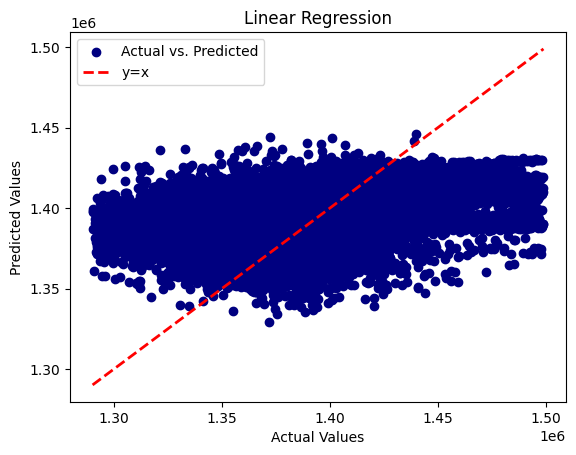

In [ ]:
plotPredResults(y_pred, "Linear Regression")

In [ ]:
mse_linear = np.mean((y_valid - y_pred)**2)
mse_linear

1898477801.1332996

Points close to the diagonal line (y = x) indicate good predictions.

**Ridge** ***Regression***

Objective: Minimize the sum of squared residuals along with a penalty term, which is the squared sum of the coefficients multiplied by a regularization parameter (alpha or λ).

Effect: Encourages the model to keep all features in the equation but shrinks their coefficients toward zero. It is effective when there is multicollinearity among predictors.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_valid)

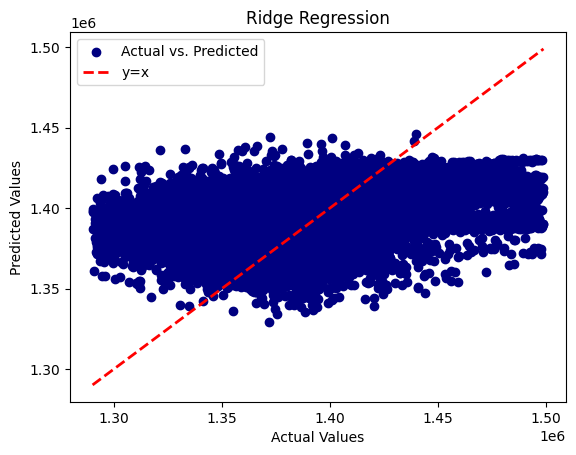

In [ ]:
plotPredResults(y_pred_ridge, "Ridge Regression")

In [ ]:
mse_ridge = np.mean((y_valid - y_pred_ridge)**2)
mse_ridge

1898477801.1255174

**Lasso Regression**

Objective: Minimize the sum of squared residuals with a penalty term, which is the absolute sum of the coefficients multiplied by a regularization parameter (alpha or λ).

Effect: Encourages sparsity in the model by driving some coefficients to exactly zero. It is useful for feature selection when dealing with a large number of predictors.

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)

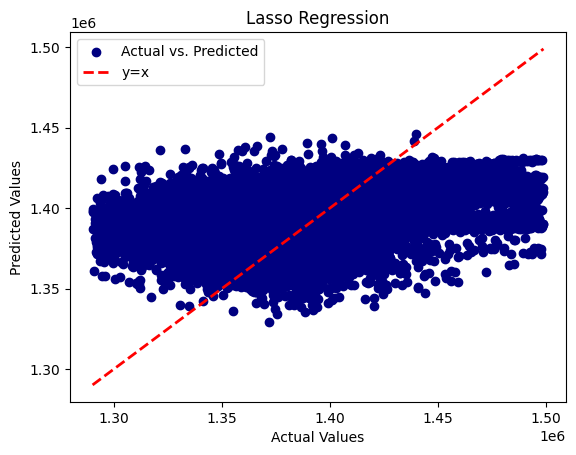

In [ ]:
plotPredResults(y_pred_lasso, "Lasso Regression")

In [ ]:
mse_lasso = np.mean((y_valid - y_pred_lasso)**2)
mse_lasso

1898478890.241636

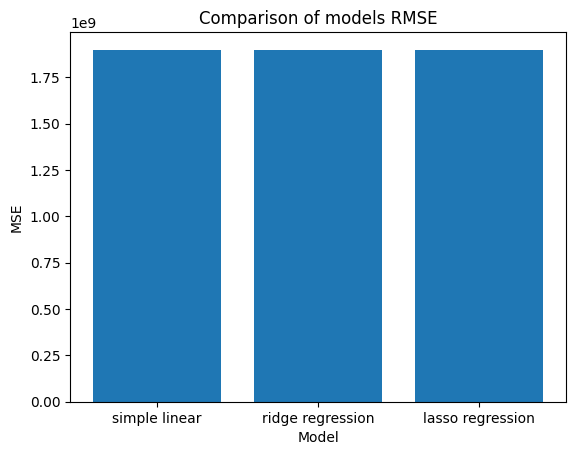

In [ ]:
models = ["simple linear", "ridge regression", "lasso regression"]
MSE = [mse_linear, mse_ridge, mse_lasso]
plt.bar(models, MSE)
plt.title('Comparison of models RMSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

In [ ]:
min(mse_linear, mse_ridge, mse_lasso)
#Najmniejszy MSE spośród liniowych modeli ma lasso, chociaż wszystkie są zjebane

1898477801.1255174

The graphical analysis of the provided data highlights the inadequacy of linear regression models in addressing the underlying issue. The consistent mismatch between observed data points and regression lines suggests a non-linear nature in the dataset. This prompts a reconsideration of modeling strategies, indicating the need for more sophisticated approaches to capture the complexity inherent in the data.

**Polynomal Regression**


Training Polynomal Regression Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_train = X_train.values.reshape(-1,32)
y_train = y_train.values.reshape(-1)
X_test = X_test.values.reshape(-1,32)
y_test = y_test.values.reshape(-1)

Plotting the model

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
pr = LinearRegression()

pr.fit(X_train_poly, y_train)

X_valid_poly = poly_features.transform(X_valid)
y_pred_poly = pr.predict(X_valid_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but PolynomialFeatures was fitted without feature names



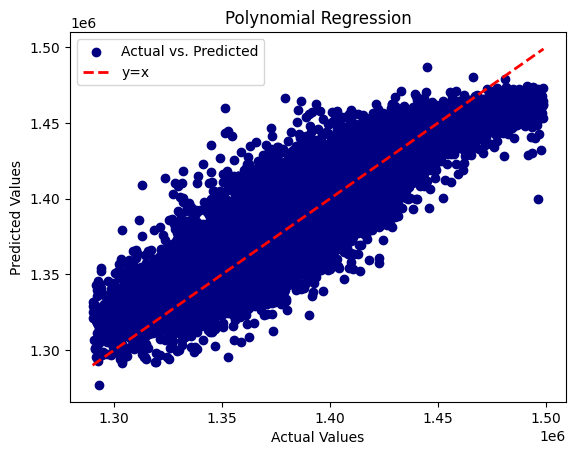

In [ ]:
plotPredResults(y_pred_poly, "Polynomial Regression")

**XGBoost**

XGBoost is an ensemble learning algorithm that builds a series of shallow decision trees sequentially to correct errors made by previous trees. It utilizes gradient boosting to optimize a specific loss function, incorporates regularization to control model complexity, and features a learning rate for scaling the contribution of each tree. XGBoost is known for its efficiency, scalability, and ability to handle large datasets, providing accurate predictions and insights into feature importance.

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)

y_pred_xgb = xgboost.predict(X_valid)

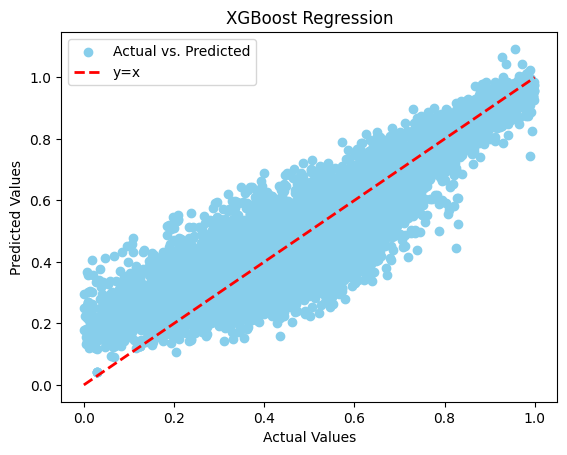

In [ ]:
plotPredResults(y_pred_xgb, "XGBoost Regression", color='skyblue')

# Random Forest

We are using 3 models
- 20 trees
- 50 trees
- 200 trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 20 trees
random_forest_regressor_20 = RandomForestRegressor(n_estimators=20, random_state=0)

random_forest_regressor_20.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



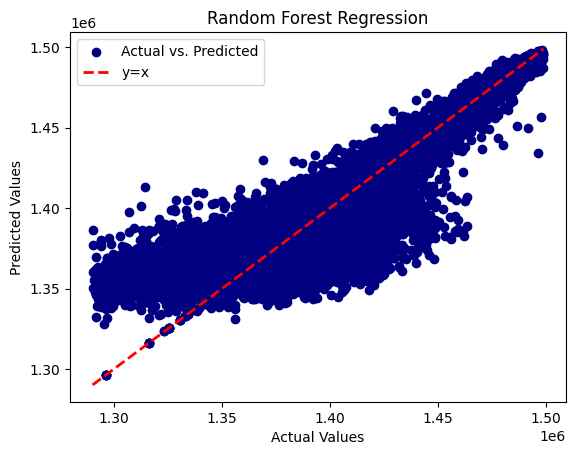

536254102.0963159

In [ ]:
# Predicting Values
y_pred_forest_20 = random_forest_regressor_20.predict(X_valid)
plotPredResults(y_pred_forest_20, "Random Forest Regression")
mse_pred_forest_20 = np.mean((y_valid - y_pred_forest_20)**2)
mse_pred_forest_20

In [ ]:
# 50 trees
random_forest_regressor_50 = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_regressor_50.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



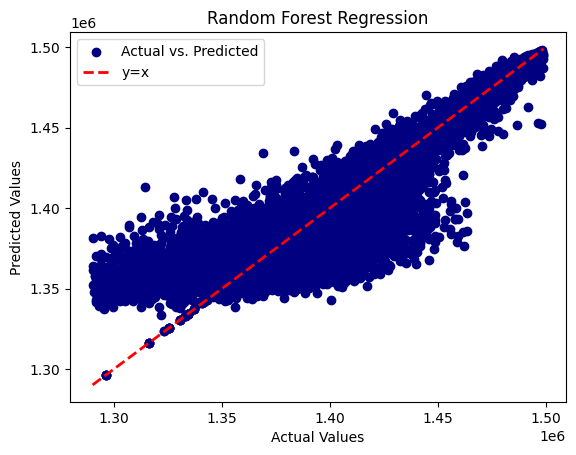

519905494.22723436

In [ ]:
# Predicting Values
y_pred_forest_50 = random_forest_regressor_50.predict(X_valid)
plotPredResults(y_pred_forest_50, "Random Forest Regression")
mse_pred_forest_50 = np.mean((y_valid - y_pred_forest_50)**2)
mse_pred_forest_50

In [ ]:
# 200 trees
random_forest_regressor_200 = RandomForestRegressor(n_estimators=200, random_state=0)

random_forest_regressor_200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



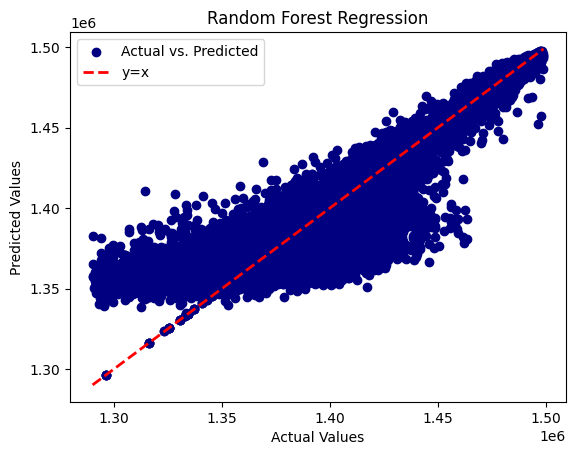

509694715.34820294

In [ ]:
# Predicting Values
y_pred_forest_200 = random_forest_regressor_200.predict(X_valid)
plotPredResults(y_pred_forest_200, "Random Forest Regression")
mse_pred_forest_200 = np.mean((y_valid - y_pred_forest_200)**2)
mse_pred_forest_200

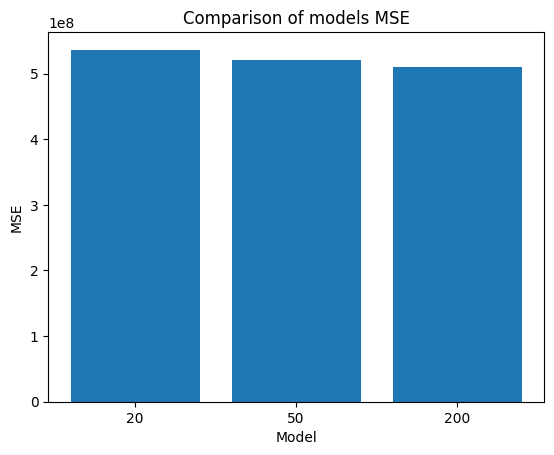

In [ ]:
randomTreeTypes = ["20", "50", "200"]
MSE = [mse_pred_forest_20,mse_pred_forest_50,mse_pred_forest_200]
plt.bar(randomTreeTypes, MSE)
plt.title('Comparison of models MSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

Wniosek: dalej będziemy korzystać z modelu z 200 drzewami

# SVM

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=2)
regressor.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names



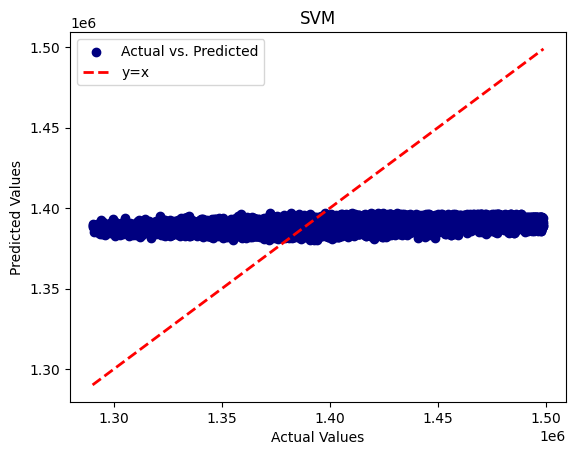

2127443697.524887

In [ ]:
# Predicting Values
y_pred_SVR_poly = regressor.predict(X_valid)
plotPredResults(y_pred_SVR_poly, "SVM")
mse_pred_SVR_poly = np.mean((y_valid - y_pred_SVR_poly)**2)
mse_pred_SVR_poly

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=3)
regressor.fit(X_train, y_train)

SVR(kernel='poly')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names



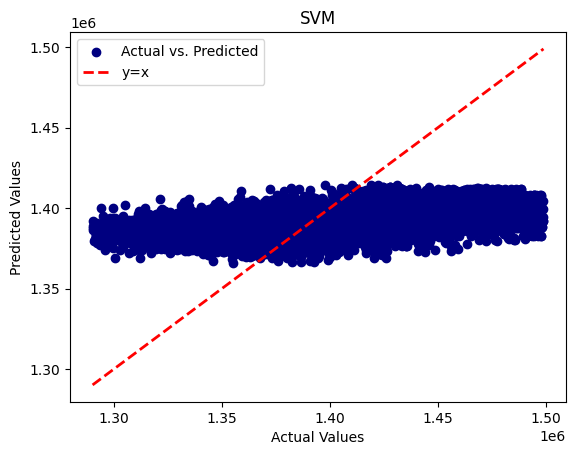

1877139505.4176881

In [ ]:
# Predicting Values
y_pred_SVR_poly_3 = regressor.predict(X_valid)
plotPredResults(y_pred_SVR_poly_3, "SVM")
mse_pred_SVR_poly_3 = np.mean((y_valid - y_pred_SVR_poly_3)**2)
mse_pred_SVR_poly_3

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names



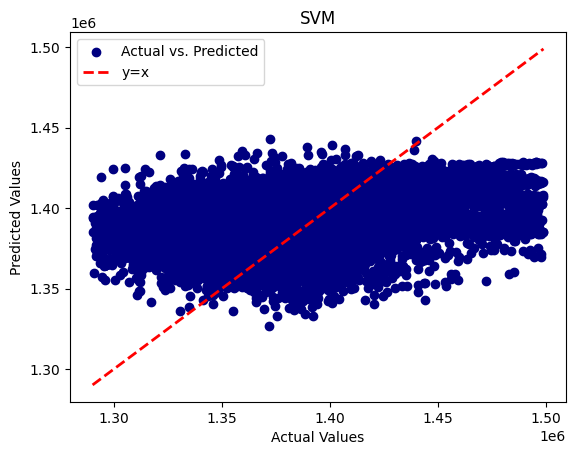

1906874939.3848073

In [ ]:
# Predicting Values
y_pred_SVR_linear = regressor.predict(X_valid)
plotPredResults(y_pred_SVR_linear, "SVM")
mse_pred_SVR_linear = np.mean((y_valid - y_pred_SVR_linear)**2)
mse_pred_SVR_linear

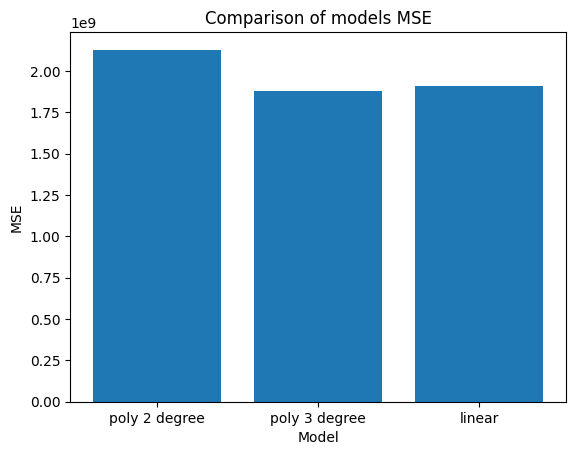

In [ ]:
svrTypes = ["poly 2 degree","poly 3 degree", "linear"]
MSE = [mse_pred_SVR_poly,mse_pred_SVR_poly_3,mse_pred_SVR_linear]
plt.bar(svrTypes, MSE)
plt.title('Comparison of models MSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

## Testing model's performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
def calculate_rmse(actual_values, predicted_values):
    mse = np.mean((actual_values - predicted_values)**2)
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
# y_pred_final_linear = lr.predict(X_test)
# rmse_final_linear = calculate_rmse(y_test, y_pred_final_linear)
# r2_linear = r2_score(y_test, y_pred_final_linear)

# X_test_poly = poly_features.transform(X_test)
# y_pred_final_poly = pr.predict(X_test_poly)
# rmse_final_poly = calculate_rmse(y_test, y_pred_final_poly)
# r2_poly = r2_score(y_test, y_pred_final_poly)

y_pred_final_xgb = xgboost.predict(X_test)
rmse_final_xgb = calculate_rmse(y_test, y_pred_final_xgb)
r2_xgb = r2_score(y_test, y_pred_final_xgb)

# y_pred_final_rf = random_forest_regressor_200.predict(X_test)
# rmse_final_rf = calculate_rmse(y_test, y_pred_final_rf)
# r2_rf = r2_score(y_test, y_pred_final_rf)

# y_pred_final_svr = regressor.predict(X_test)
# rmse_final_svr = calculate_rmse(y_test, y_pred_final_svr)
# r2_svr = r2_score(y_test, y_pred_final_svr)

rmse_final_xgb

3758472.2762103067

In [ ]:
models = ['Linear', 'Polynomial', 'XGBoost', 'RandomForest', 'SVR']
RMSE = [rmse_final_linear, rmse_final_poly, rmse_final_xgb, rmse_final_rf, rmse_final_svr]
R2 = [r2_linear,r2_poly,r2_xgb,r2_rf,r2_svr]

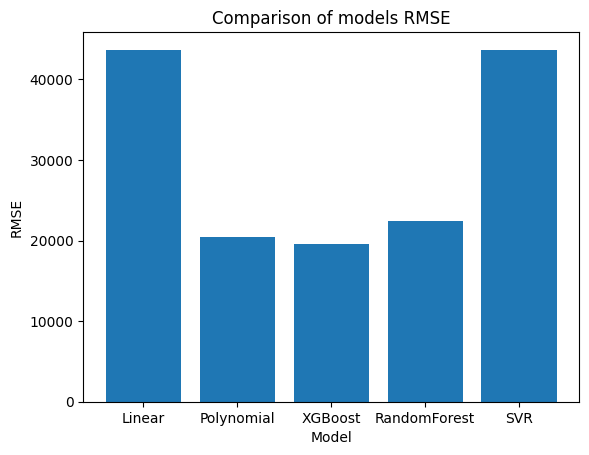

In [ ]:
plt.bar(models, RMSE)
plt.title('Comparison of models RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

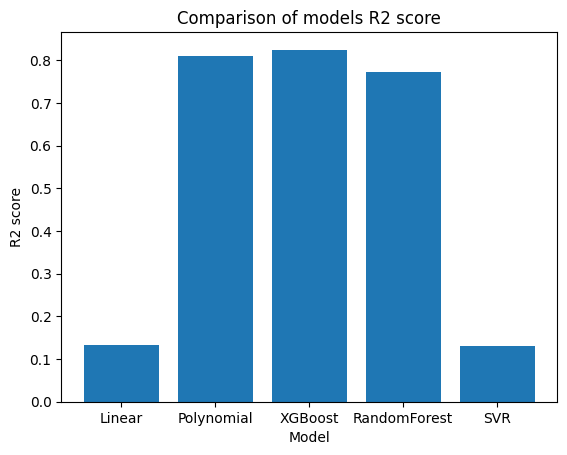

In [ ]:
plt.bar(models, R2)
plt.title('Comparison of models R2 score')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()

# Trash

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

mlp_model = Sequential()
mlp_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
mlp_model.add(Dense(units=32, activation='relu'))
mlp_model.add(Dense(units=1, activation='linear'))  # Linear activation for regression


mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_mlp = mlp_model.predict(X_valid)

plotPredResults(y_pred_mlp, "MLP Regression")

In [ ]:
def plot_surface_model(df, wec_num, step_size=1000):
    x = df[f'X{wec_num}'].to_numpy()
    y = df[f'Y{wec_num}'].to_numpy()
    z = df[f'P{wec_num}'].to_numpy()

    print('x', x.shape)
    print('y', y.shape)
    print('z', z.shape)

    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='P'),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=0.5)
        )
    )

    fig = go.Figure(data=[go.Surface(z=[x, y, z])], layout=layout)
    fig.show()


In [ ]:
def sort_columns(df):
  return adel_df.reindex(sorted(df.columns), axis=1)

In [ ]:
def plotMean(df):
  mean_line = df.mean(axis=0)
  plt.plot(df.columns, mean_line, color='black', linewidth=2, label='Mean Line')

In [ ]:
def plotExample(df, title):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'aquamarine', 'darkorange', 'indigo', 'lightcoral', 'seagreen', 'orchid']

    plt.figure(figsize=[10, 6])
    plt.xlabel("position")
    plt.ylabel("power")
    plt.yscale(value='log')
    plt.xscale(value='linear')

    for i in range(10,15):
        plt.plot(df.columns, df.loc[i], color=colors[i % len(colors)], linewidth=0.7)
    plotMean(df)

    plt.xticks(range(0, len(df.columns), 5), df.columns[::5])
    plt.title(title)
    plt.show()

While the absence of data regarding the collected power does not pose a significant concern, it is noteworthy that in several instances, there is a lack of values pertaining to at least one of the position coordinates

Imputing missing values is a crucial step in the data preprocessing pipeline. Missing values can cause issues with various statistical and machine learning algorithms, and imputation helps to provide a more complete dataset for analysis or modeling. In this specific case, the code is replacing zeros with NaN and then filling in those NaN values with the mean of the non-missing values. This approach is a simple but common way to handle missing data, especially when the missing values are expected to be missing at random and the mean is a reasonable estimate for imputation.

The replace_zeros function replaces zeros in a DataFrame (df) with NaN, calculates the mean of non-missing values, and fills NaNs with this mean. This process helps handle missing data, treating zeros as missing and imputing them with the mean for analysis or modeling.

In [ ]:
def replace_zeros(df):
   df = df.replace(0, np.nan)
   mean_value = df.mean()
   mean_imputation = df.fillna(mean_value)
   return mean_imputation

In [ ]:
for df in [df_adel, df_perth, df_sydney, df_tasm]:
    df = replace_zeros(df)
    print(df.isnull().sum().sum())
    zeros_df = (df == 0)
    print(zeros_df.sum().sum())

In [ ]:
# poly_features = PolynomialFeatures(degree=2, include_bias=False)

# X_train_poly = poly_features.fit_transform(X_train)
# pr = LinearRegression()

# pr.fit(X_train_poly, y_train)

# X_valid_poly = poly_features.transform(X_valid)

# y_pred_poly = pr.predict(X_valid_poly)

# plt.scatter(y_valid, y_pred_poly, label='Actual vs. Predicted')
# plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='y=x')
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values for Polynomial Regression")
# plt.legend()
# plt.show()